In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cauchy_simulations import ModifiedCauchyLiquidityProfile, SymmetricModel, to_bps_tick, from_bps_tick

In [27]:
# closest to Curve A=250
C = 10.0  # total liquidity parameter
GAMMA = 0.0125  # scale parameter of 125 bps
PEG_MULTIPLE = 32  # peg of 4000 bps
PEG = PEG_MULTIPLE * GAMMA

R = 3  # 2**R ticks per segment of discretized model
MAX_TICK = 887272
TICK_SPACING = 10  # step size between ticks in arrays

In [30]:
# get rid of modulus from tick spacing
MAX_TICK = MAX_TICK - MAX_TICK % TICK_SPACING
MAX_TICK

887270

In [31]:
def modified_c(c: int, pm: int) -> float:
    return c / (1 + 1/(1 + pm**2))

In [32]:
MC = modified_c(C, PEG_MULTIPLE)
mclp = ModifiedCauchyLiquidityProfile(c=MC, gamma=GAMMA, peg=PEG)

In [33]:
bps_ticks = np.arange(start=-MAX_TICK, stop=MAX_TICK, step=TICK_SPACING)
df = pd.DataFrame(data={'bps_ticks': bps_ticks, 'log_ticks': from_bps_tick(bps_ticks)})

In [34]:
# plot liquidity profile over ticks
df[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]'] = mclp.at(df['log_ticks'])

In [35]:
df

,bps_ticks,log_ticks,"ml(t) [c=9.990253411306043, g=0.0125, peg=0.4]"
0,-887270,-88.722564,0.2482
1,-887260,-88.721564,0.2482
2,-887250,-88.720564,0.2482
3,-887240,-88.719564,0.2482
4,-887230,-88.718564,0.2482
...,...,...,...
177449,887220,88.717564,0.2482
177450,887230,88.718564,0.2482
177451,887240,88.719564,0.2482
177452,887250,88.720564,0.2482


<Axes: xlabel='bps_ticks'>

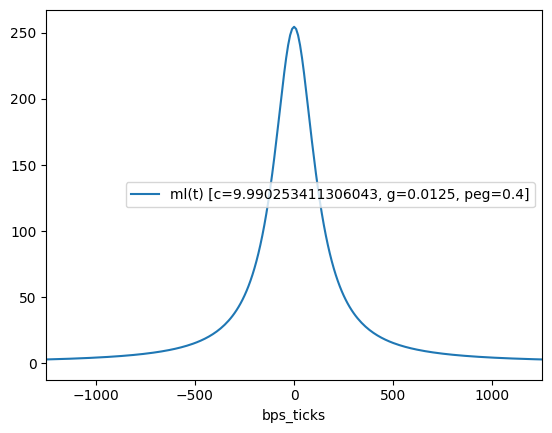

In [36]:
df.plot(x='bps_ticks', y=f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', xlim=(to_bps_tick(-10 * GAMMA), to_bps_tick(10 * GAMMA)))

In [37]:
# discretized symmetric model
symm = SymmetricModel(t_max=from_bps_tick(MAX_TICK), s=GAMMA, r=R)

In [38]:
symm.n()

12

In [39]:
symm.segments()

array([[5.12e+01, 2.56e+01],
       [2.56e+01, 1.28e+01],
       [1.28e+01, 6.40e+00],
       [6.40e+00, 3.20e+00],
       [3.20e+00, 1.60e+00],
       [1.60e+00, 8.00e-01],
       [8.00e-01, 4.00e-01],
       [4.00e-01, 2.00e-01],
       [2.00e-01, 1.00e-01],
       [1.00e-01, 5.00e-02],
       [5.00e-02, 2.50e-02],
       [2.50e-02, 1.25e-02],
       [1.25e-02, 0.00e+00]])

In [40]:
symm.ticks()

array([5.12000e+01, 4.80000e+01, 4.48000e+01, 4.16000e+01, 3.84000e+01,
       3.52000e+01, 3.20000e+01, 2.88000e+01, 2.56000e+01, 2.40000e+01,
       2.24000e+01, 2.08000e+01, 1.92000e+01, 1.76000e+01, 1.60000e+01,
       1.44000e+01, 1.28000e+01, 1.20000e+01, 1.12000e+01, 1.04000e+01,
       9.60000e+00, 8.80000e+00, 8.00000e+00, 7.20000e+00, 6.40000e+00,
       6.00000e+00, 5.60000e+00, 5.20000e+00, 4.80000e+00, 4.40000e+00,
       4.00000e+00, 3.60000e+00, 3.20000e+00, 3.00000e+00, 2.80000e+00,
       2.60000e+00, 2.40000e+00, 2.20000e+00, 2.00000e+00, 1.80000e+00,
       1.60000e+00, 1.50000e+00, 1.40000e+00, 1.30000e+00, 1.20000e+00,
       1.10000e+00, 1.00000e+00, 9.00000e-01, 8.00000e-01, 7.50000e-01,
       7.00000e-01, 6.50000e-01, 6.00000e-01, 5.50000e-01, 5.00000e-01,
       4.50000e-01, 4.00000e-01, 3.75000e-01, 3.50000e-01, 3.25000e-01,
       3.00000e-01, 2.75000e-01, 2.50000e-01, 2.25000e-01, 2.00000e-01,
       1.87500e-01, 1.75000e-01, 1.62500e-01, 1.50000e-01, 1.375

In [41]:
np.array([int(to_bps_tick(t)) for t in symm.ticks()])

array([512025, 480023, 448022, 416020, 384019, 352017, 320015, 288014,
       256012, 240011, 224011, 208010, 192009, 176008, 160007, 144007,
       128006, 120005, 112005, 104005,  96004,  88004,  80003,  72003,
        64003,  60002,  56002,  52002,  48002,  44002,  40001,  36001,
        32001,  30001,  28001,  26001,  24001,  22001,  20000,  18000,
        16000,  15000,  14000,  13000,  12000,  11000,  10000,   9000,
         8000,   7500,   7000,   6500,   6000,   5500,   5000,   4500,
         4000,   3750,   3500,   3250,   3000,   2750,   2500,   2250,
         2000,   1875,   1750,   1625,   1500,   1375,   1250,   1125,
         1000,    937,    875,    812,    750,    687,    625,    562,
          500,    468,    437,    406,    375,    343,    312,    281,
          250,    234,    218,    203,    187,    171,    156,    140,
          125,    109,     93,     78,     62,     46,     31,     15])

In [42]:
# compare with discretized model of distribution
df[f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'] = df['log_ticks'].apply(lambda t: symm.at(t, mclp))

In [43]:
df

,bps_ticks,log_ticks,"ml(t) [c=9.990253411306043, g=0.0125, peg=0.4]","dml(t) [c=9.990253411306043, g=0.0125, peg=0.4]"
0,-887270,-88.722564,0.2482,0.24821
1,-887260,-88.721564,0.2482,0.24821
2,-887250,-88.720564,0.2482,0.24821
3,-887240,-88.719564,0.2482,0.24821
4,-887230,-88.718564,0.2482,0.24821
...,...,...,...,...
177449,887220,88.717564,0.2482,0.24821
177450,887230,88.718564,0.2482,0.24821
177451,887240,88.719564,0.2482,0.24821
177452,887250,88.720564,0.2482,0.24821


<Axes: xlabel='bps_ticks'>

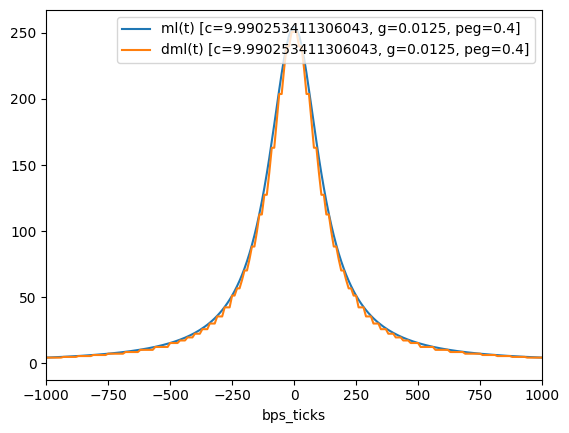

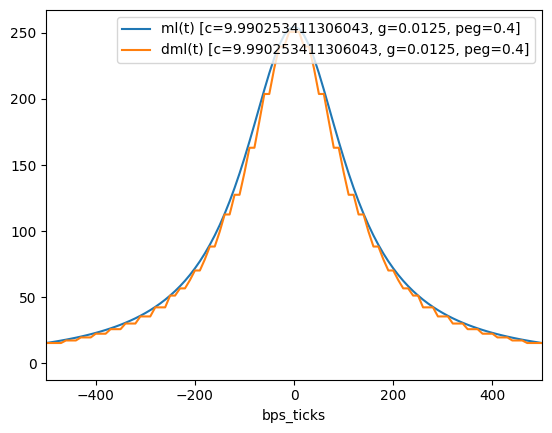

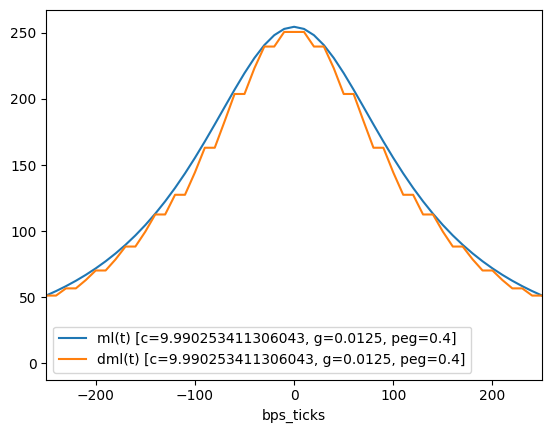

In [47]:
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(-8 * GAMMA), to_bps_tick(8 * GAMMA)))
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(-4 * GAMMA), to_bps_tick(4 * GAMMA)))
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(-2 * GAMMA), to_bps_tick(2 * GAMMA)))

<Axes: xlabel='bps_ticks'>

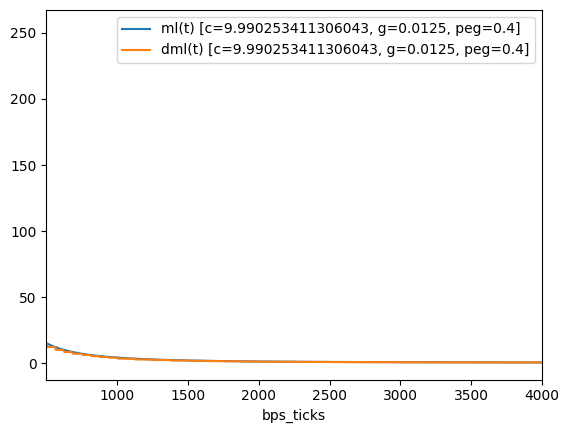

In [50]:
df.plot(x='bps_ticks', y=[f'ml(t) [c={MC}, g={GAMMA}, peg={PEG}]', f'dml(t) [c={MC}, g={GAMMA}, peg={PEG}]'], xlim=(to_bps_tick(4 * GAMMA), to_bps_tick(32 * GAMMA)))